In [1]:

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
from scipy import stats



In [2]:
df = pd.read_csv('/Users/saturn/Downloads/kc_house_data.csv')



In [3]:
print(df.describe())



                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

In [4]:

df['price'].dtypes
print(df['price'].describe())


count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


In [5]:

def checkDist(dist):
    sns.distplot(dist, color= 'pink')
    plt.title('Distribution')
    plt.legend(['Normal dist. ($Skew=$ {:.2f} and $Kurtosis=$ {:.2f} )'.format(dist.skew(), dist.kurt())],
            loc='best')
    fig = plt.figure()
    res = stats.probplot(dist, plot=plt)
    plt.show()
    return

Distribution of price:


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


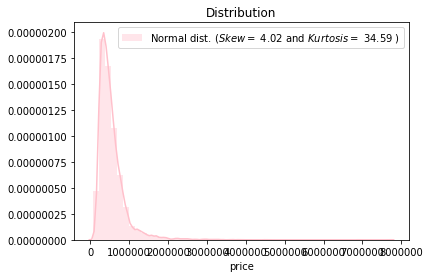

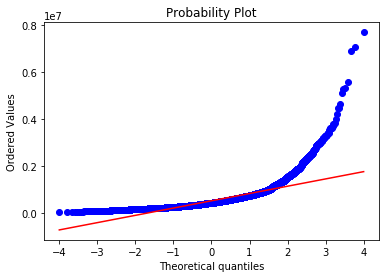

None
This distribution is right skewed. To fix this, i will use log transform.
Distribution of price with log transform:


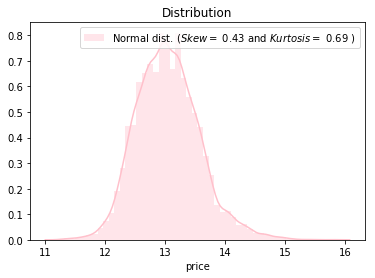

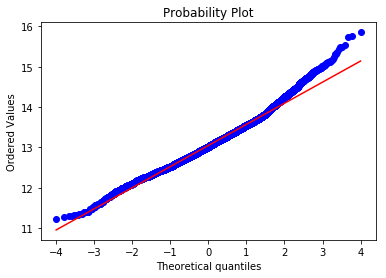

None


In [6]:

print('Distribution of price:')
print(checkDist(df['price']))
print('This distribution is right skewed. To fix this, i will use log transform.')
print('Distribution of price with log transform:')
print(checkDist(np.log1p(df["price"])))


In [7]:

#deal with missing datas:
print(df.isnull().sum())
#was für ein unrealisitsches Dataset


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


AxesSubplot(0.2165,0.125;0.5285x0.755)


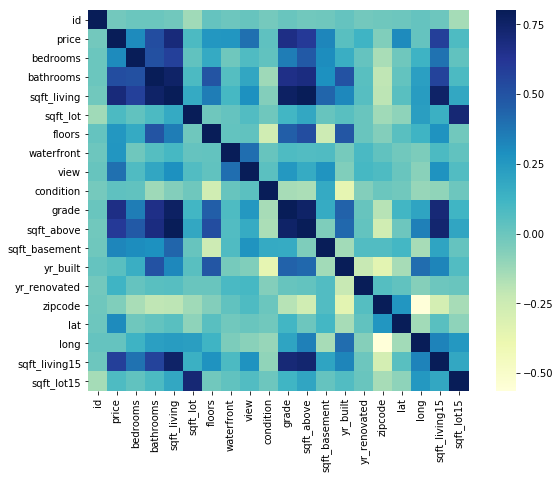

In [8]:

#heatmap for correlation
corr = df.corr()
plt.subplots(figsize=(10,7))
print(sns.heatmap(corr, vmax=0.8,square=True, cmap="YlGnBu"))

AxesSubplot(0.2165,0.125;0.5285x0.755)


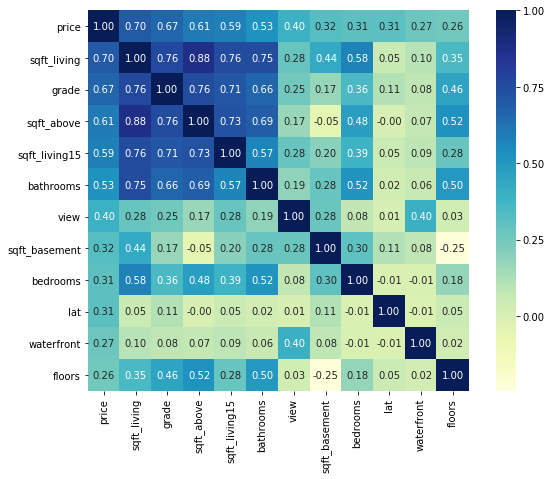

In [9]:

#a closer look to the 12 variables most correlated to price
var = corr.nlargest(12, 'price')['price'].index
#var = var.drop(column='lat')
corrm = np.corrcoef(df[var].values.T)
#sns.set(font_scale=1.25)
plt.subplots(figsize=(10,7))
print(sns.heatmap(corrm, cbar=True, annot=True, square=True, cmap="YlGnBu", fmt='.2f', annot_kws={'size': 10}, yticklabels=var.values, xticklabels=var.values))


/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


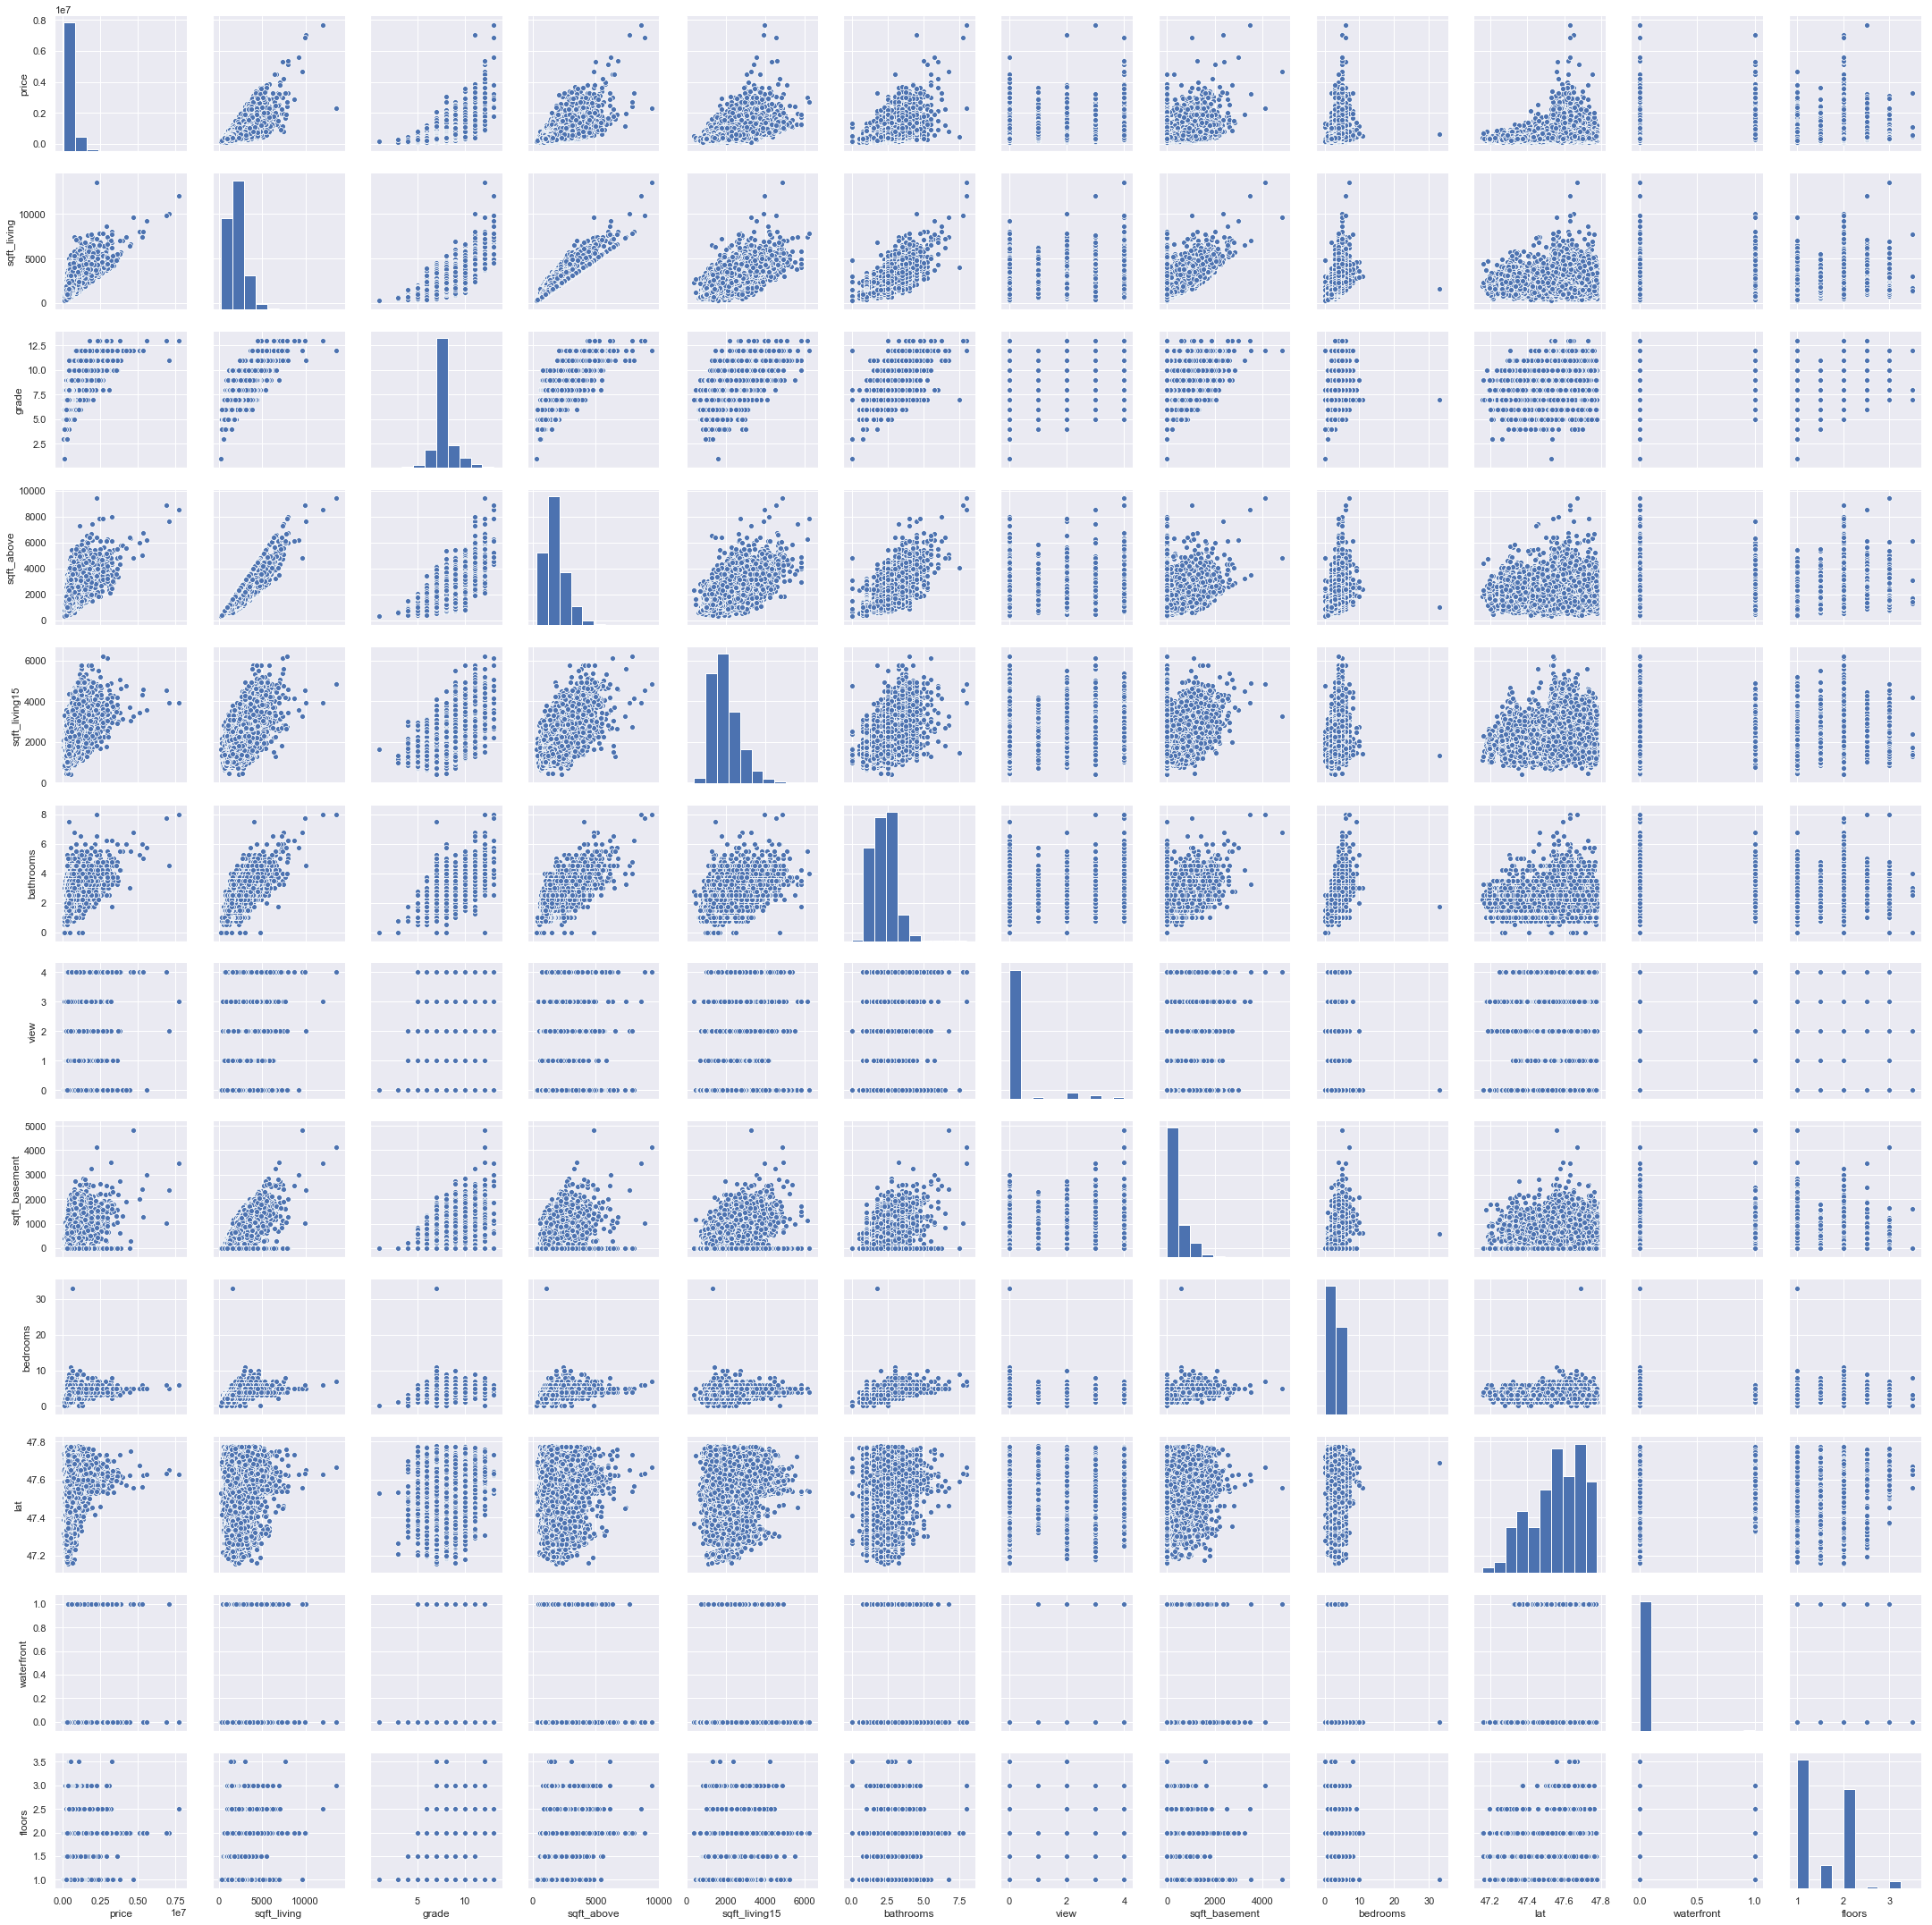

In [10]:
#pairplot
sns.set()
sns.pairplot(df[var], size = 2.5)
plt.show();

KeyboardInterrupt: 

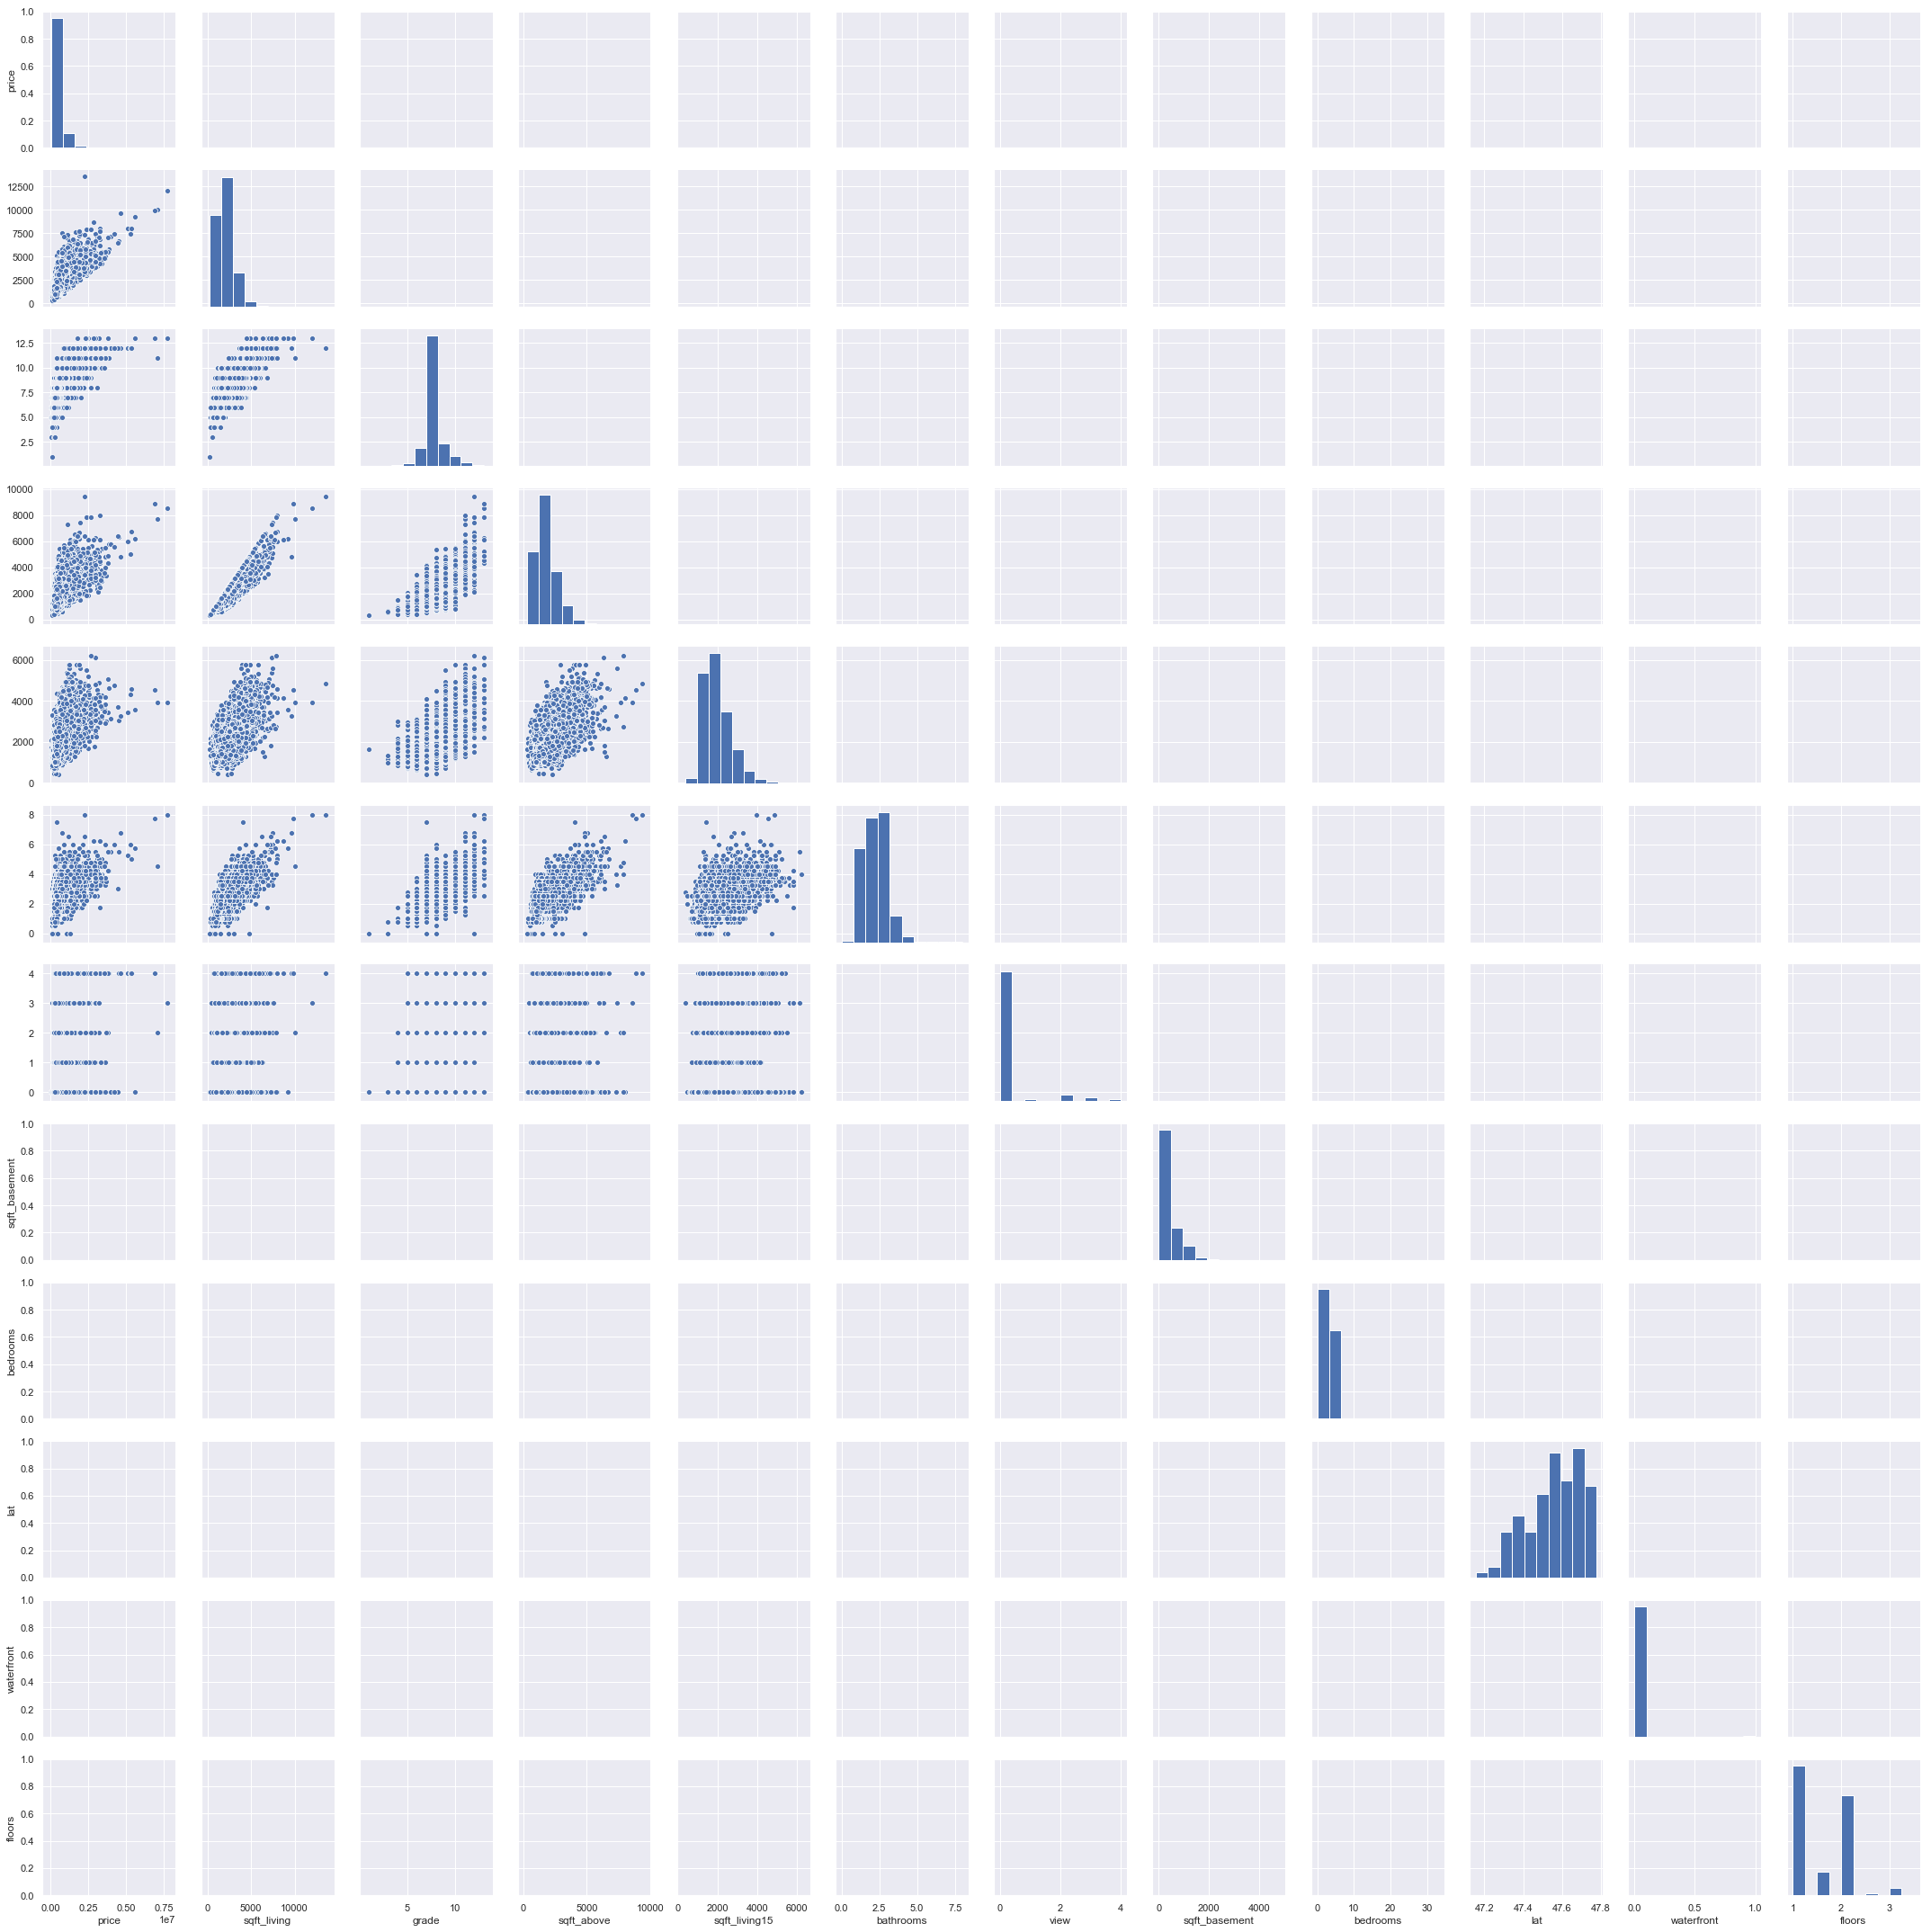

In [11]:
#pairplot
sns.set()
sns.pairplot(df[var], height= 2.5)
plt.show();

In [ ]:

for m in var:
    df_new= pd.concat([df[var]], axis=1)


In [12]:
df_new= df_new.drop(columns= ['lat','sqft_basement'])    


NameError: name 'df_new' is not defined

In [13]:
for m in var:
    df_new= pd.concat([df[var]], axis=1)

In [14]:
df_new= df_new.drop(columns= ['lat','sqft_basement'])    


In [15]:
print(len(df_new['bathrooms'].unique()))


30


In [16]:

categorical= []
numerical =[]

In [17]:

for col in df_new:
    if len(df_new[col].unique())<31:
        categorical.append(col)
    else:
        numerical.append(col)
        

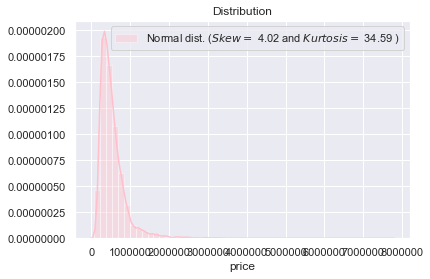

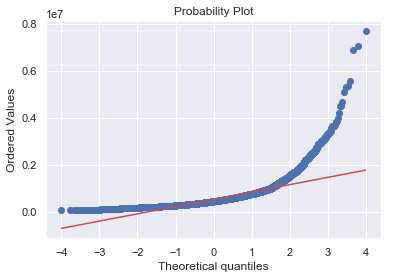

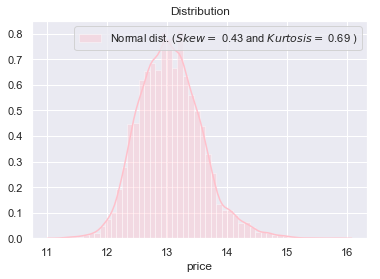

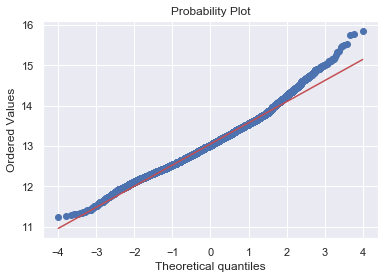

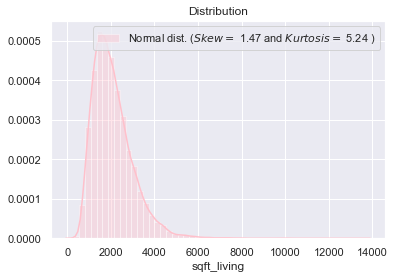

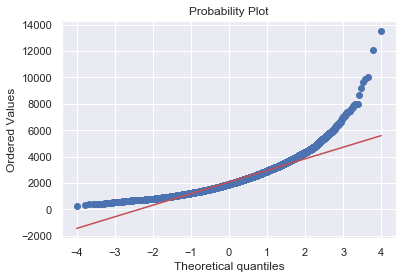

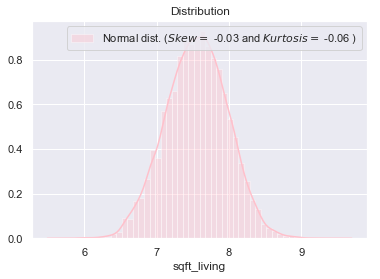

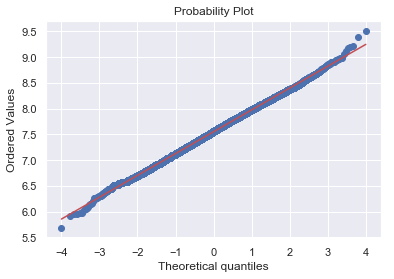

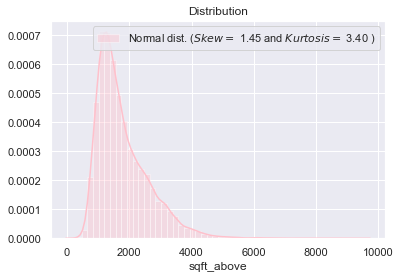

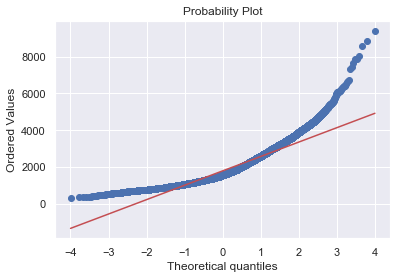

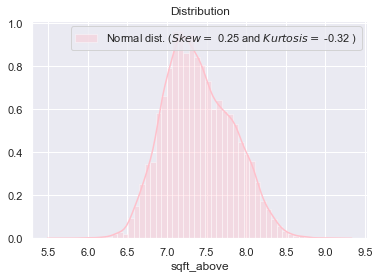

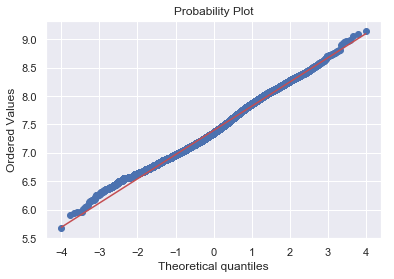

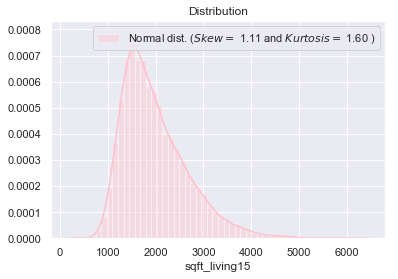

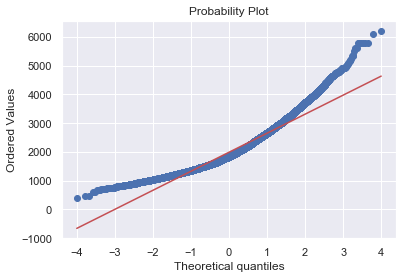

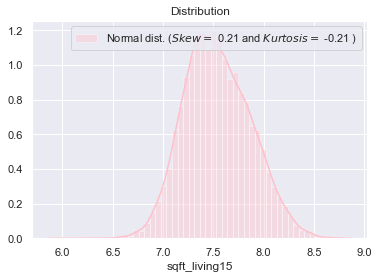

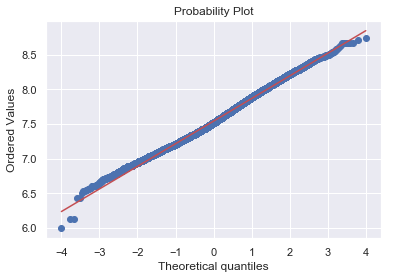

In [18]:
for feat in numerical:
    checkDist(df_new[feat])
    checkDist(np.log1p(df_new[feat]))

In [19]:
for a in ('price','sqft_living15','sqft_living', 'sqft_living'):
    df_new[a]= np.log1p(df_new[a])

In [20]:
var_new=list(var)


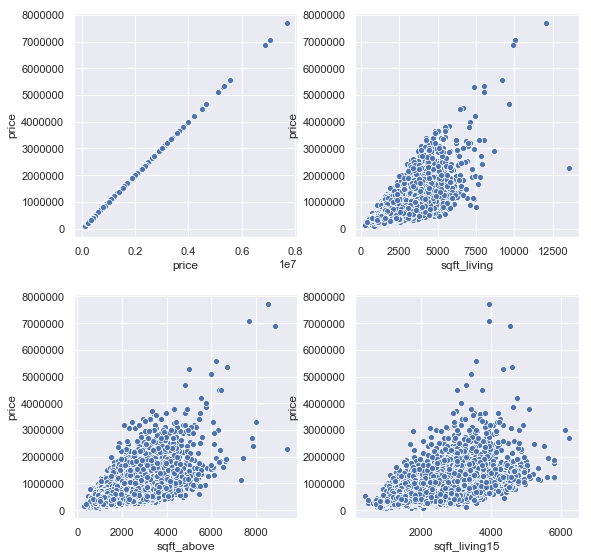

In [21]:
#scatterplot for numerical features
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
cols =2
rows= 2
fig, axs = plt.subplots(rows, cols, figsize=(cols*4,rows*4))
for r in range(0,rows):
    for c in range(0,cols):  
        i = r*cols+c
        if i < len(var_new):
             sns.scatterplot(x=numerical[i], y='price', data=df, ax = axs[r][c], palette= 'Set2')
plt.tight_layout()    
plt.show()   


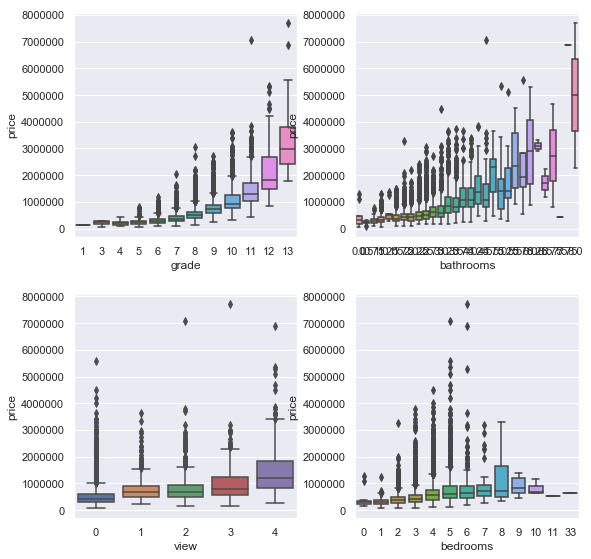

In [22]:
#boxplot for categorical features
cat_cols =3
cat_rows= 2
fig, axs = plt.subplots(rows, cols, figsize=(cols*4,rows*4))
for r in range(0,rows):
    for c in range(0,cols):  
        i = r*cols+c
        if i < len(var_new):
             sns.boxplot(x=categorical[i], y='price', data=df, ax = axs[r][c])
plt.tight_layout()    
plt.show()   

[1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]


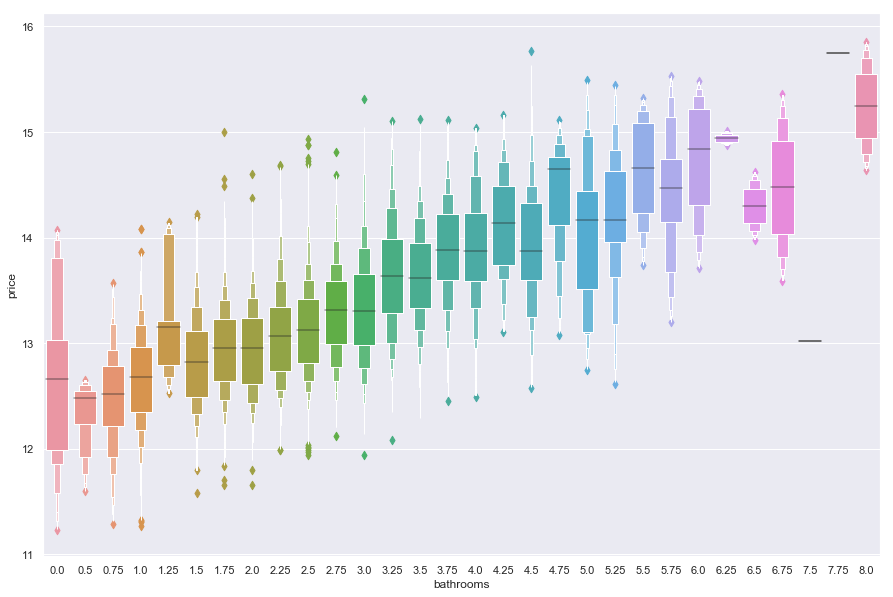

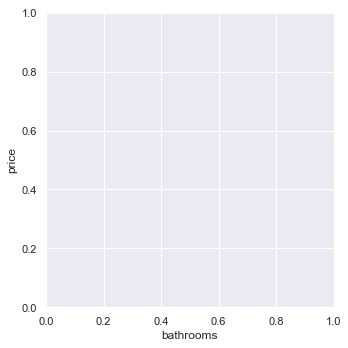

In [23]:
#deal with bathrooms features
print(df_new['bathrooms'].unique())
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
fig, ax = plt.subplots(figsize=(15,10))
sns.catplot(x='bathrooms', y='price',data= df_new, ax=ax, kind= 'boxen')


In [24]:
X = df_new.drop(columns = ['price'])
y =df_new.iloc[:, 0].values

In [25]:
#create train and testset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17290, 9) (17290,)
(4323, 9) (4323,)


In [26]:
from sklearn.linear_model import LinearRegression
# Train the model using the training sets
reg= LinearRegression(fit_intercept=True, normalize=False).fit(X_train,y_train)
# Make predictions using the testing set
y_pred = reg.predict(X_test)
print(y_pred.shape)
# The coefficients
from sklearn.metrics import mean_squared_error, r2_score
print('Coefficients: \n', reg.coef_)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

(4323,)
Coefficients: 
 [ 3.25495290e+00  1.84284363e-01 -3.75077612e-05  1.64395369e-01
  2.78940145e-03  8.67492535e-02 -9.11197016e-03  3.91921191e-01
  1.00886210e-02]
Mean squared error: 0.11
Variance score: 0.57


In [27]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train,y_train)
y_pred_ridge= ridge.predict(X_test)
print('Coefficients: \n', ridge.coef_)
print('Variance score: %.2f' % r2_score(y_test, y_pred_ridge))

Coefficients: 
 [ 2.86930166e+00  1.86304659e-01 -2.87723305e-05  1.75156548e-01
  8.97699956e-03  8.78730921e-02 -4.77229517e-03  3.87675414e-01
  6.49827694e-03]
Variance score: 0.57
